<a href="https://colab.research.google.com/github/urtaqoyaki/deteksidini/blob/main/deteksi_dini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB

#Stacking
from mlxtend.classifier import StackingClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#instalisasi google drive
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from google.colab import drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/Dataset
!ls


df = pd.read_excel('/content/drive/MyDrive/Tugas AI_Auliya Afifah Adnan Hakim/Final/students_mental_health_survey.xlsx')

df.head()

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/My Drive/Dataset'
/content
drive  sample_data


,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


In [ ]:
print(df.shape)
print(df.describe())
print(df.info())

(7022, 20)
               Age        CGPA  Stress_Level  Depression_Score  Anxiety_Score  \
count  7022.000000  7010.00000   7022.000000       7022.000000    7022.000000   
mean     23.003418     3.49127      2.427941          2.254486       2.300484   
std       3.853978     0.28742      1.638408          1.625193       1.624305   
min      18.000000     2.44000      0.000000          0.000000       0.000000   
25%      20.000000     3.29000      1.000000          1.000000       1.000000   
50%      22.000000     3.50000      2.000000          2.000000       2.000000   
75%      25.000000     3.70000      4.000000          3.000000       4.000000   
max      35.000000     4.00000      5.000000          5.000000       5.000000   

       Financial_Stress  Semester_Credit_Load  
count       7022.000000           7022.000000  
mean           2.453005             22.010538  
std            1.708995              4.358380  
min            0.000000             15.000000  
25%            1.00

In [ ]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                             Total   Percent
Substance_Use                   15  0.002136
CGPA                            12  0.001709
Age                              0  0.000000
Relationship_Status              0  0.000000
Semester_Credit_Load             0  0.000000
Extracurricular_Involvement      0  0.000000
Financial_Stress                 0  0.000000
Chronic_Illness                  0  0.000000
Family_History                   0  0.000000
Counseling_Service_Use           0  0.000000
Social_Support                   0  0.000000
Course                           0  0.000000
Diet_Quality                     0  0.000000
Physical_Activity                0  0.000000
Sleep_Quality                    0  0.000000
Anxiety_Score                    0  0.000000
Depression_Score                 0  0.000000
Stress_Level                     0  0.000000
Gender                           0  0.000000
Residence_Type                   0  0.000000


In [ ]:
df.drop(['Substance_Use'], axis= 1, inplace=True)
df.drop(['CGPA'], axis= 1, inplace=True)

df.isnull().sum().max()
df.head(5)

,Age,Course,Gender,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3,3,2,Good,Moderate,Good,Moderate,Married,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,0,3,0,Average,Low,Average,Low,Single,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,4,0,3,Good,Low,Average,Moderate,In a Relationship,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,2,1,0,Average,Low,Average,Moderate,Single,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3,3,4,Good,Low,Average,High,Married,Never,No,Yes,0,High,23,On-Campus


In [ ]:
#Clean 'Gender'
gender = df['Gender'].unique()
print(gender)

['Male' 'Female']


In [ ]:
#complete missing age with mean
df['Age'].fillna(df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(df['Age'])
s[s<18] = df['Age'].median()
df['Age'] = s
s = pd.Series(df['Age'])
s[s>120] = df['Age'].median()
df['Age'] = s

#Ranges of Age
df['age_range'] = pd.cut(df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)


In [ ]:
mean = df['Stress_Level'].mean()
mean

2.427940757618912

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = l.fit_transform(df[i])

In [ ]:
x = df.drop('Stress_Level',axis = 1)
y = df['Stress_Level']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 20, random_state = 2)


In [ ]:
#Encoding data
labelDict = {}
for feature in df:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)


label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
label_Course [0, 1, 2, 3, 4, 5]
label_Gender [0, 1]
label_Stress_Level [0, 1, 2, 3, 4, 5]
label_Depression_Score [0, 1, 2, 3, 4, 5]
label_Anxiety_Score [0, 1, 2, 3, 4, 5]
label_Sleep_Quality [0, 1, 2]
label_Physical_Activity [0, 1, 2]
label_Diet_Quality [0, 1, 2]
label_Social_Support [0, 1, 2]
label_Relationship_Status [0, 1, 2]
label_Counseling_Service_Use [0, 1, 2]
label_Family_History [0, 1]
label_Chronic_Illness [0, 1]
label_Financial_Stress [0, 1, 2, 3, 4, 5]
label_Extracurricular_Involvement [0, 1, 2]
label_Semester_Credit_Load [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
label_Residence_Type [0, 1, 2]
label_age_range ['0-20', '21-30', '31-65']


In [ ]:
df.head()

,Age,Course,Gender,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,age_range
0,7,5,1,3,3,2,1,2,1,2,1,1,0,0,2,2,2,1,1
1,6,2,0,0,3,0,0,1,0,1,2,2,0,0,3,1,12,1,1
2,1,0,0,4,0,3,1,1,0,2,0,2,0,0,4,0,0,1,0
3,1,1,1,2,1,0,0,1,0,2,2,1,0,0,4,2,5,0,0
4,0,0,1,3,3,4,1,1,0,0,1,1,0,1,0,0,8,1,0


In [ ]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                             Total  Percent
Age                              0      0.0
Relationship_Status              0      0.0
Residence_Type                   0      0.0
Semester_Credit_Load             0      0.0
Extracurricular_Involvement      0      0.0
Financial_Stress                 0      0.0
Chronic_Illness                  0      0.0
Family_History                   0      0.0
Counseling_Service_Use           0      0.0
Social_Support                   0      0.0
Course                           0      0.0
Diet_Quality                     0      0.0
Physical_Activity                0      0.0
Sleep_Quality                    0      0.0
Anxiety_Score                    0      0.0
Depression_Score                 0      0.0
Stress_Level                     0      0.0
Gender                           0      0.0
age_range                        0      0.0


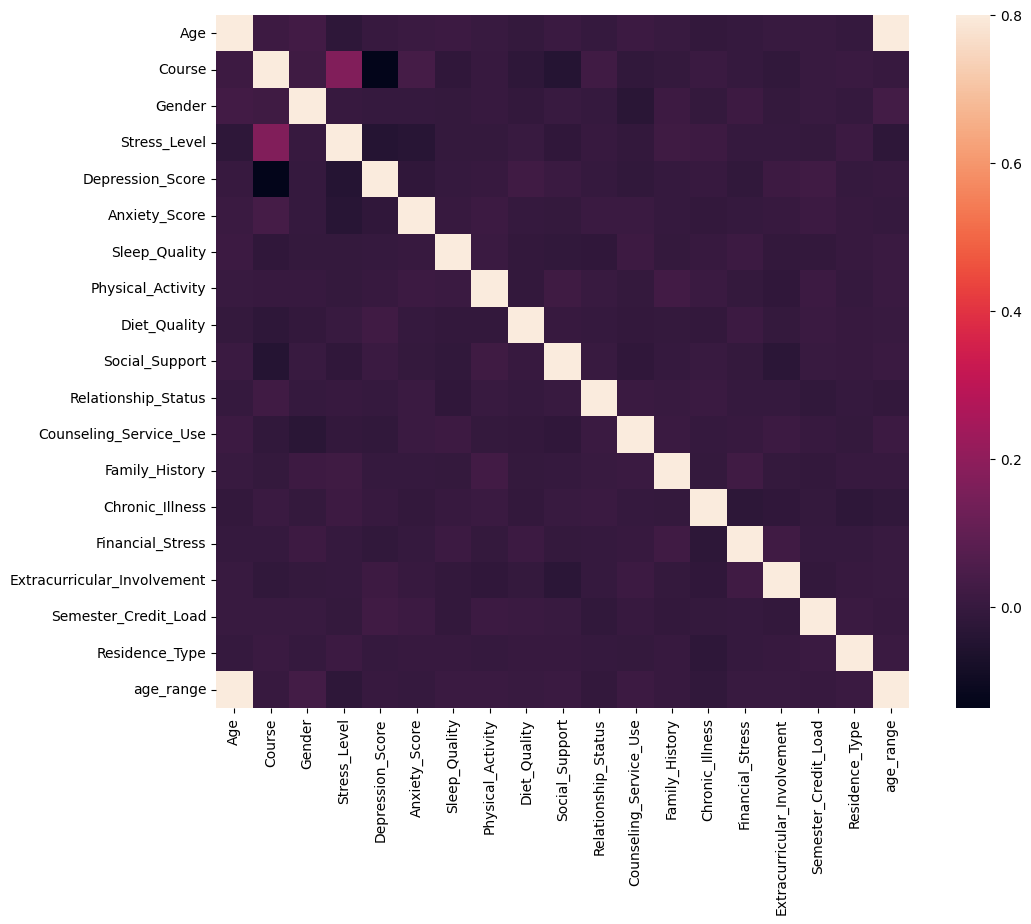

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

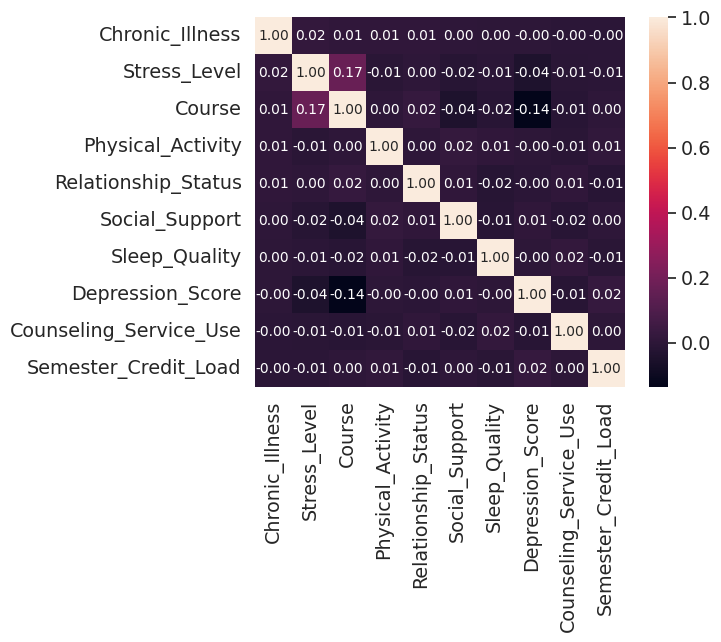

In [ ]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Chronic_Illness')['Chronic_Illness'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<ipython-input-17-93f067ee259a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], bins=24)


Text(0.5, 0, 'Age')

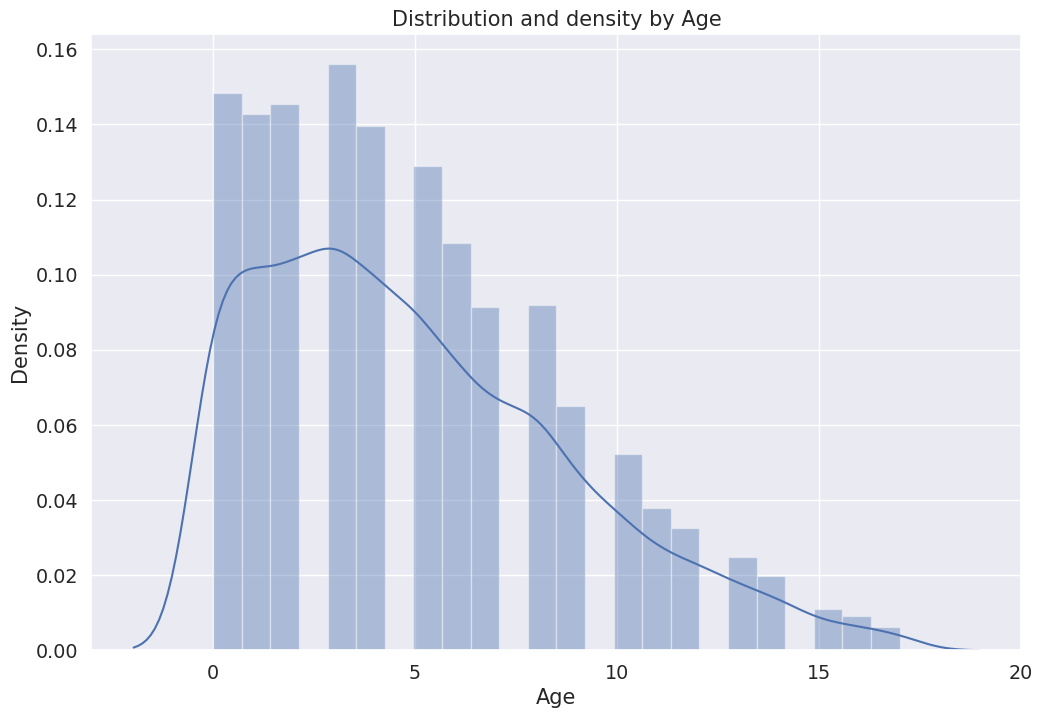

In [ ]:
# Distribution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(df["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

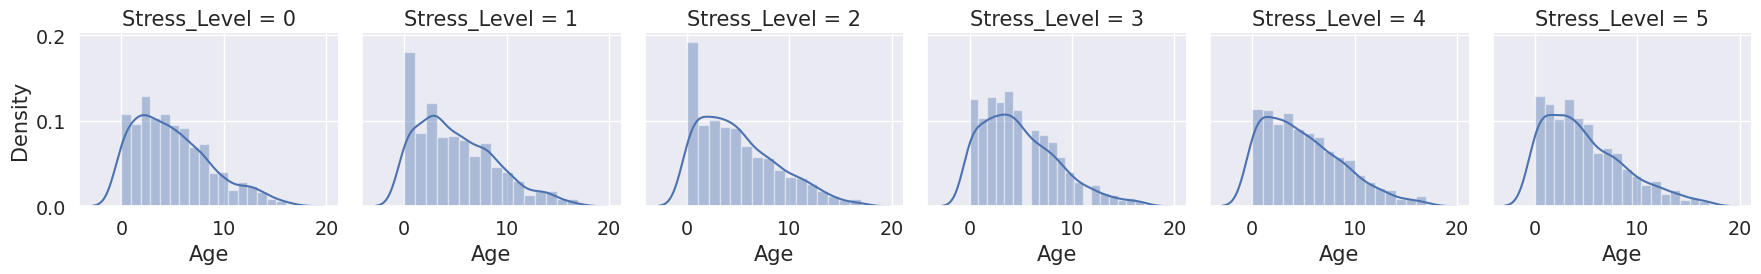

In [ ]:
g = sns.FacetGrid(df, col='Stress_Level')
g = g.map(sns.distplot, "Age")

<ipython-input-19-9d2dc666c507>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels)


Text(0.5, 1.0, 'Total Distribution by Chronic_Illness or not')

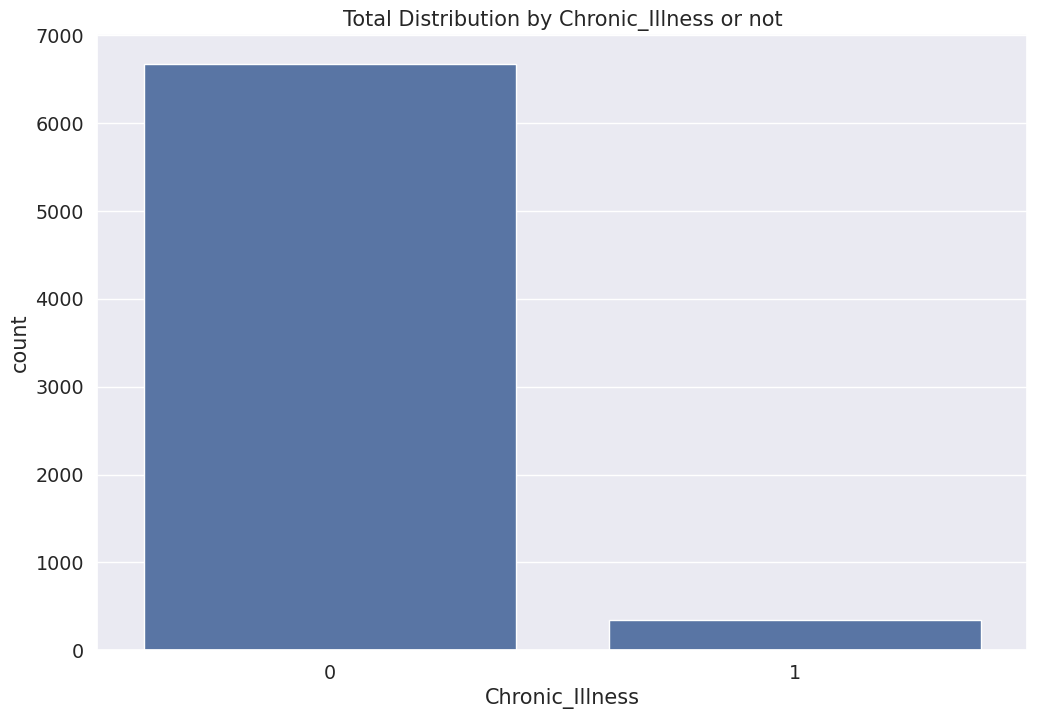

In [ ]:
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="Chronic_Illness", data=df)
g.set_xticklabels(labels)

plt.title('Total Distribution by Chronic_Illness or not')

In [ ]:
pip install -U seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


<ipython-input-21-6b71a45a65d3>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(o)


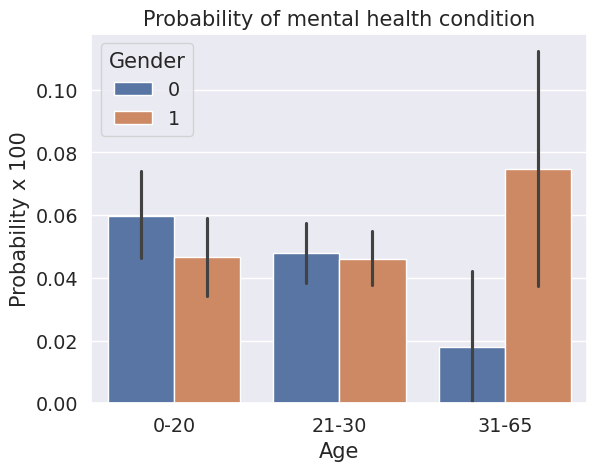

In [ ]:
o = labelDict['label_age_range']

g = sns.barplot(x="age_range", y="Chronic_Illness", hue="Gender", data=df)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

plt.show()


In [ ]:
# Scaling Age
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Age,Course,Gender,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,age_range
0,0.411765,5,1,3,3,2,1,2,1,2,1,1,0,0,2,2,2,1,1
1,0.352941,2,0,0,3,0,0,1,0,1,2,2,0,0,3,1,12,1,1
2,0.058824,0,0,4,0,3,1,1,0,2,0,2,0,0,4,0,0,1,0
3,0.058824,1,1,2,1,0,0,1,0,2,2,1,0,0,4,2,5,0,0
4,0.000000,0,1,3,3,4,1,1,0,0,1,1,0,1,0,0,8,1,0


In [ ]:

# define X and y
feature_cols = ['Age', 'Gender', 'Family_History', 'Relationship_Status', 'Social_Support', 'Anxiety_Score', 'Depression_Score', 'Stress_Level']
X = df[feature_cols]
y = df.Stress_Level

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
methodDict = {}
rmseDict = ()


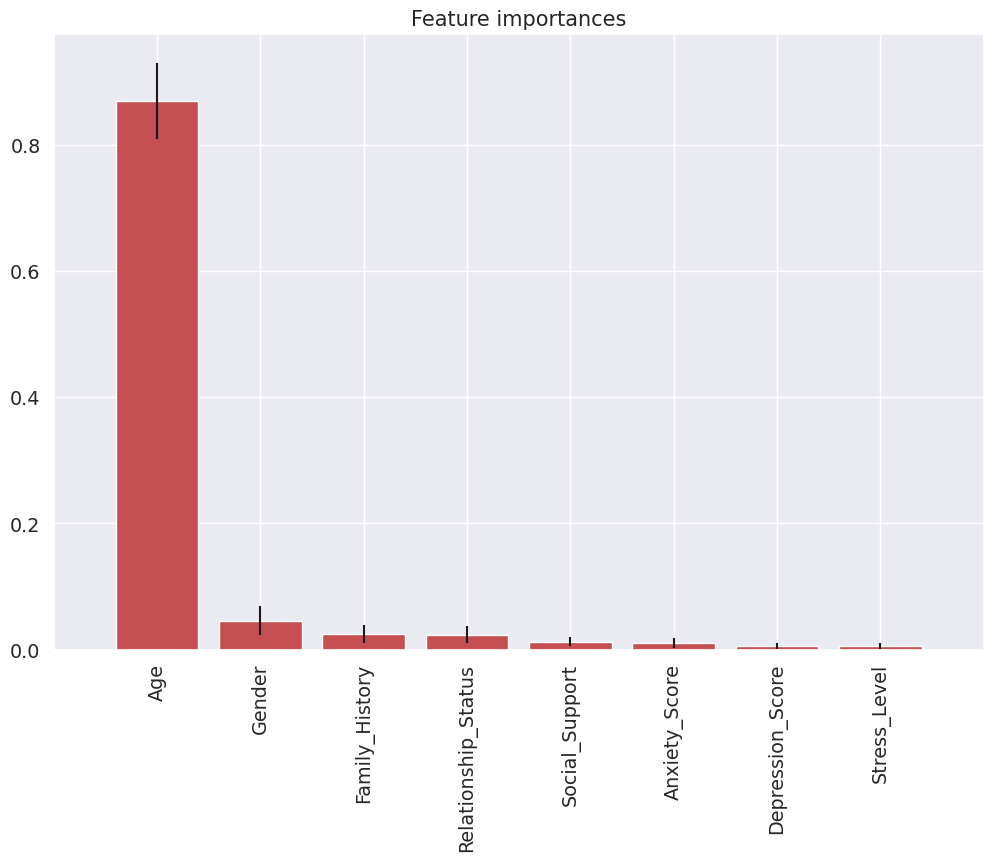

In [ ]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))

    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())

    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())

    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())

    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)

    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))

    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)

    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))


    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))

    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]

    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)

        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')


    # predict treatment if the predicted probability is greater than 0.3
    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob, 0.3)[0]

    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)

    def evaluate_threshold(threshold):
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)



    return accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def tuningCV(knn):


    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [ ]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    k_range = list(range(1, 31))
    print(k_range)

    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)

    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)

    # view the complete results (list of named tuples)
    grid.grid_scores_

    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)

    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)

    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)


In [ ]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_

    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)

    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [ ]:
def tuningMultParam(knn):

    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']

    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid)

    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)

    # view the complete results
    print(grid.grid_scores_)

    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)


Evaluating models
Logistic Regression

In [ ]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)

    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Log. Regression'] = accuracy_score * 100

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 1.0
Null accuracy:
 3    416
2    407
1    353
0    329
4    305
5    297
Name: Stress_Level, dtype: int64
Percentage of ones: 2.4299952539155196
Percentage of zeros: -1.4299952539155196
True: [5 5 2 3 1 1 1 3 5 3 5 4 2 4 4 2 1 4 3 3 3 3 2 3 1]
Pred: [5 5 2 3 1 1 1 3 5 3 5 4 2 4 4 2 1 4 3 3 3 3 2 3 1]


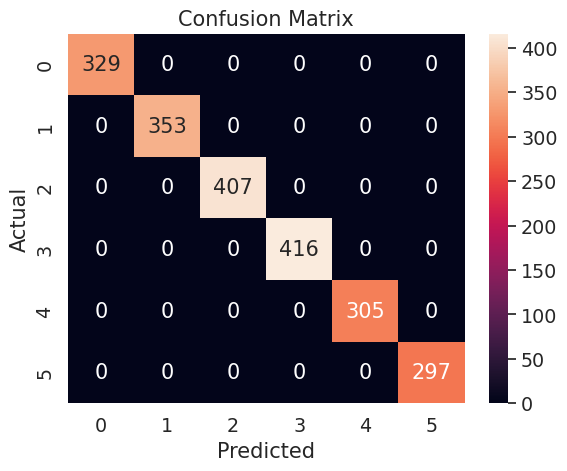

Classification Accuracy: 1.0
Classification Error: 0.0
False Positive Rate: 0.0


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
logisticRegression()

In [ ]:
# Generate predictions with the best method
clf = LogisticRegression()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'stress or not': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results.head()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Index,stress or not
0,1815,5
1,2955,5
2,1615,2
3,3318,3
4,2570,1


In [ ]:

# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'stress or not': dfTestPredictions})
results


,Index,stress or not
0,1815,5
1,2955,5
2,1615,2
3,3318,3
4,2570,1
...,...,...
2102,6795,5
2103,789,3
2104,561,5
2105,298,5


In [ ]:
results['stress'] = np.select(
    [results['stress or not'] < 2,
     results['stress or not'] > 2 ],
    ['Non Stress', 'Stress'],
    np.nan
)
print(results)

      Index  stress or not      stress
0      1815              5      Stress
1      2955              5      Stress
2      1615              2         nan
3      3318              3      Stress
4      2570              1  Non Stress
...     ...            ...         ...
2102   6795              5      Stress
2103    789              3      Stress
2104    561              5      Stress
2105    298              5      Stress
2106   3873              4      Stress

[2107 rows x 3 columns]
